In [63]:
import pandas as pd
import numpy as np
import datetime 
from pandas.plotting._matplotlib import converter
converter.register()
from datetime import date
from datetime import timedelta  
import matplotlib as mpl
import matplotlib.pyplot as plt

In [64]:
#importing excel file and removing rows with null values
admits_df = pd.read_excel(r'Documents/COVID admits per day.xlsx', sheet_name='Metric_26_bar_data')
icu_df = pd.read_excel(r'Documents/ICU occupancy.xlsx', sheet_name='Metric_32_bar(Acute+ICU_beds_by')
intubated_df = pd.read_excel(r'Documents/Total Intubations.xlsx', sheet_name='Metric_41_Bar(Intubated_PUI)_da')
occupancy_df = pd.read_excel(r'Documents/Total occupancy.xlsx', sheet_name='Metric_32_bar(Acute+ICU_beds_by')
dist_df = pd.read_excel(r'Documents/PPE_Distribution_Tracker 060820.xlsx', sheet_name='Orders Distributed')
dist_df = dist_df.dropna(axis = 0, subset=['QTY Shipped']) 

In [78]:
admits_df = admits_df.sort_values(by = 'Time Grouping (tooltip)')
result, temp = [], 0
for value in admits_df['N new admits']:
    temp += value
    result.append(temp)  
admits_df['Cumulative admits'] = result


dist_df = dist_df.sort_values(by = 'Date')
result, temp = [], 0
for value in dist_df['QTY Shipped']:
    temp += value
    result.append(temp)  
dist_df['Cumulative shipped'] = result

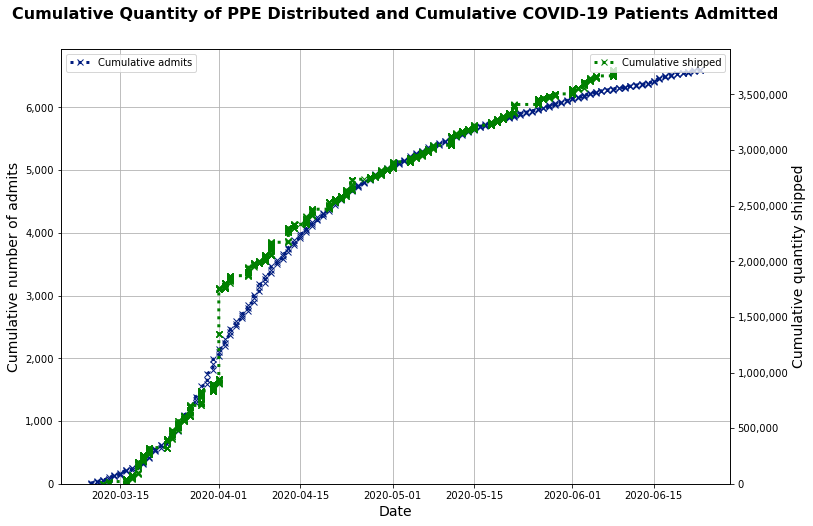

In [84]:
#settings for plot
plt.style.use('seaborn-dark-palette')
fig,ax = plt.subplots()
fig.set_size_inches(12, 8, forward=True)
ax2 = ax.twinx()

ax.plot('Time Grouping (tooltip)', 'Cumulative admits', data = admits_df, linestyle = ':', marker = 'x', linewidth = 3)
ax2.plot('Date', 'Cumulative shipped', data = dist_df, linestyle = ':', marker = 'x', linewidth = 3, color = 'green')

#setting x-axis labels
ax.set_xlabel("Date",fontsize=14)

# setting y-axis labels
ax2.set_ylabel("Cumulative quantity shipped", fontsize=14)
ax.set_ylabel("Cumulative number of admits", fontsize=14)
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax2.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylim(ymin=0)
ax2.set_ylim(ymin=0)

#labeling graphs
plt.title('Cumulative Quantity of PPE Distributed and Cumulative COVID-19 Patients Admitted', fontsize=16, pad=30, fontweight='bold')
ax.grid(True)
ax.legend(fontsize='medium', loc='upper left')
ax2.legend(fontsize='medium', loc='upper right')
fig.patch.set_facecolor('white')

<ipython-input-85-119b272b08b1>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig,ax = plt.subplots()


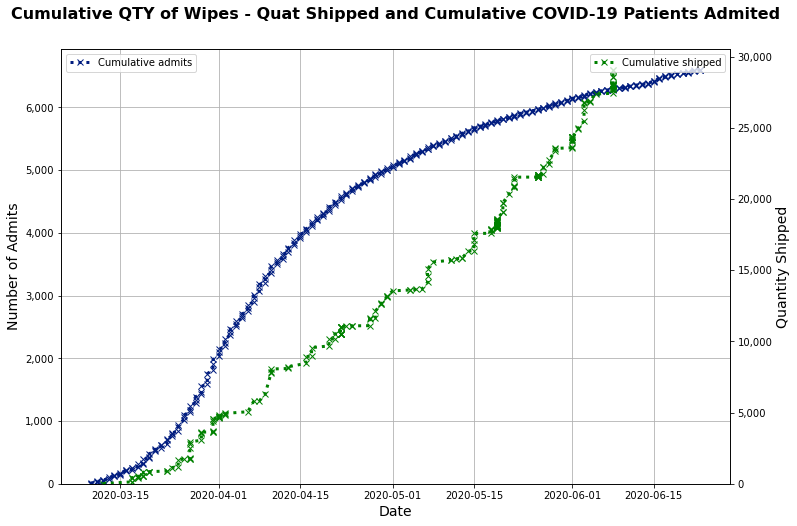

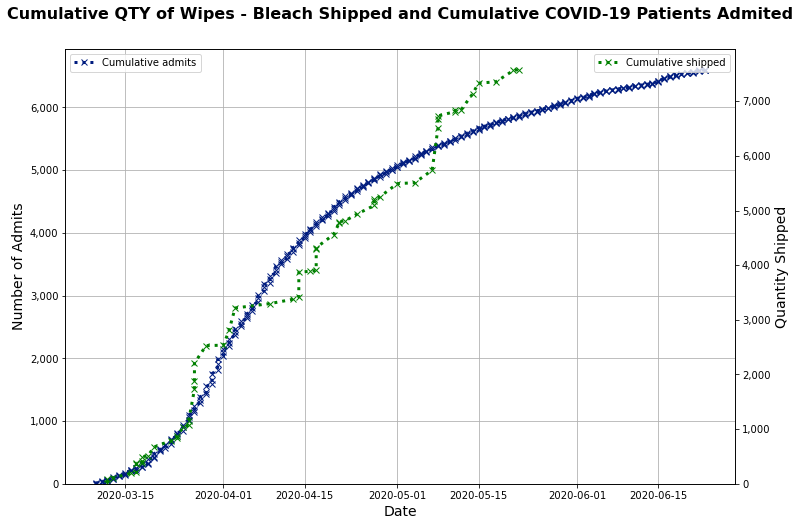

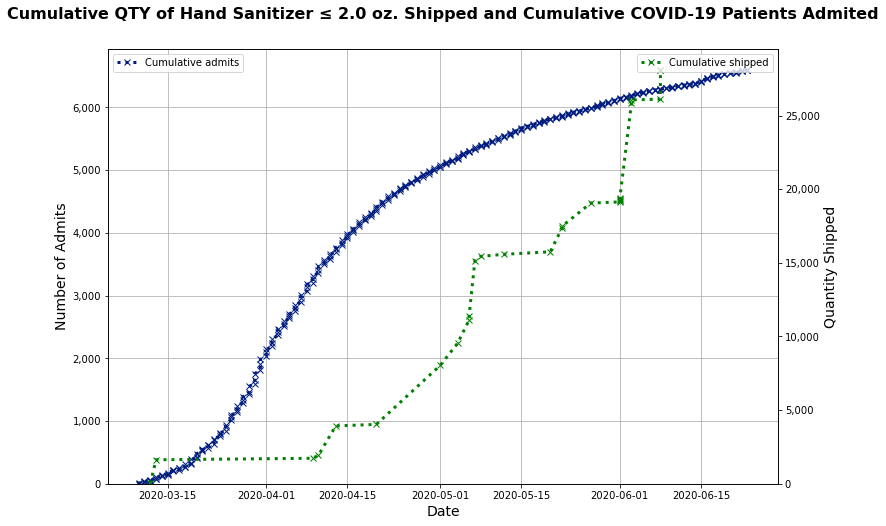

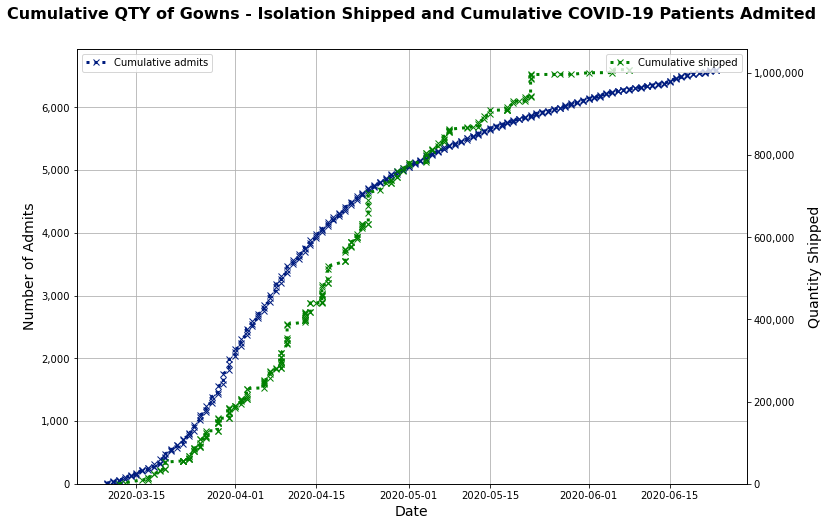

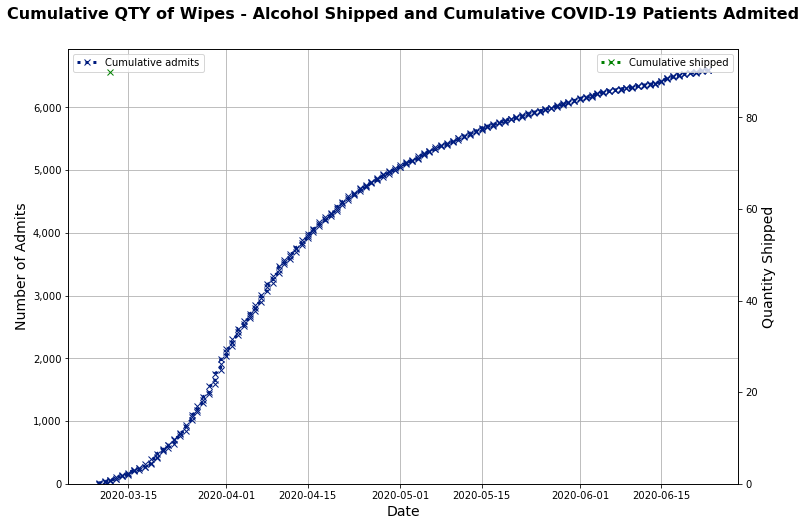

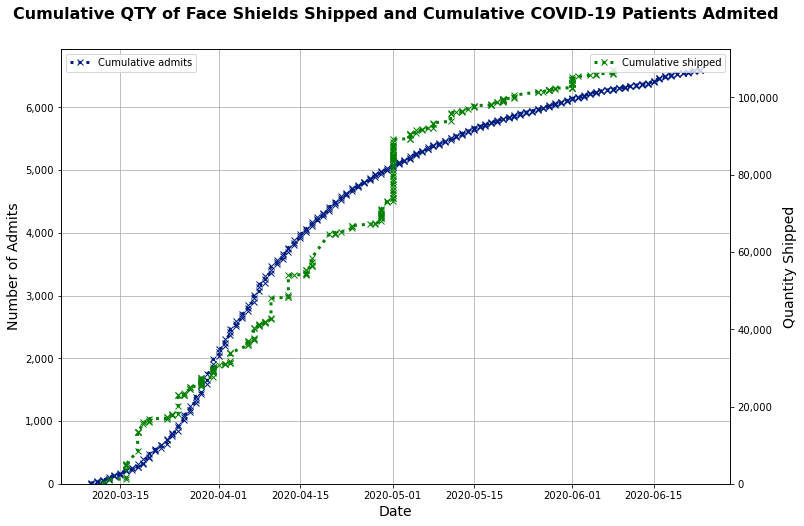

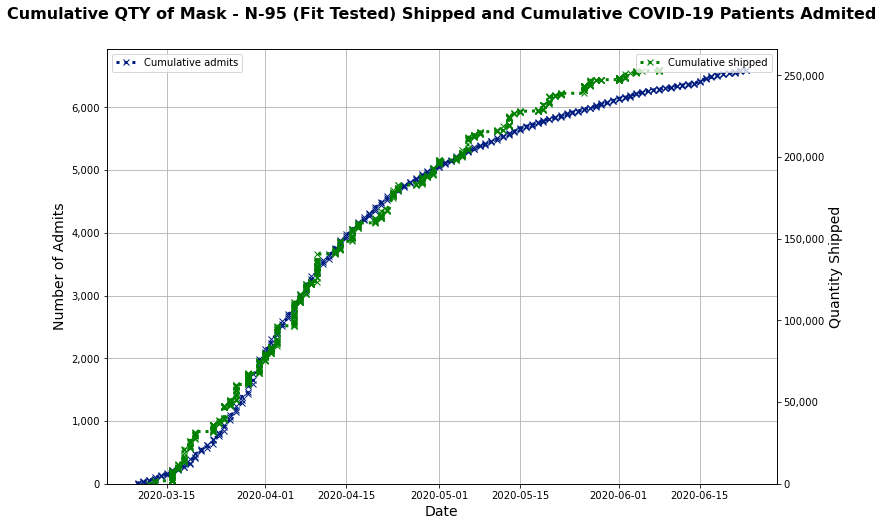

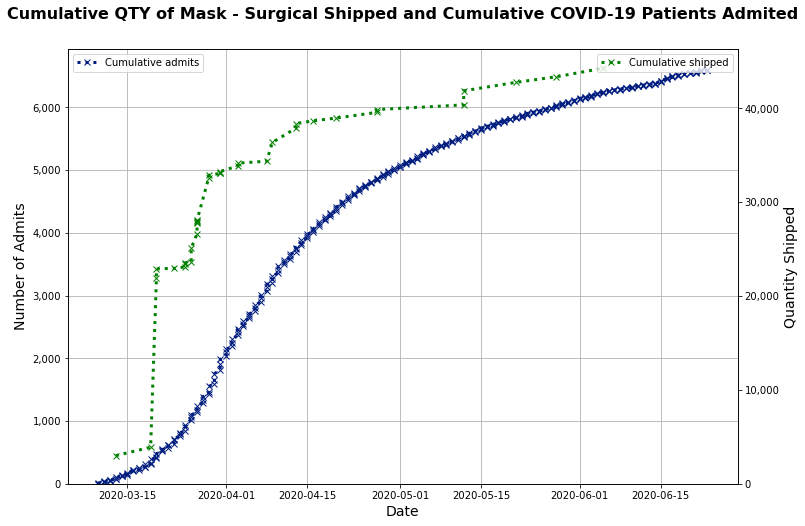

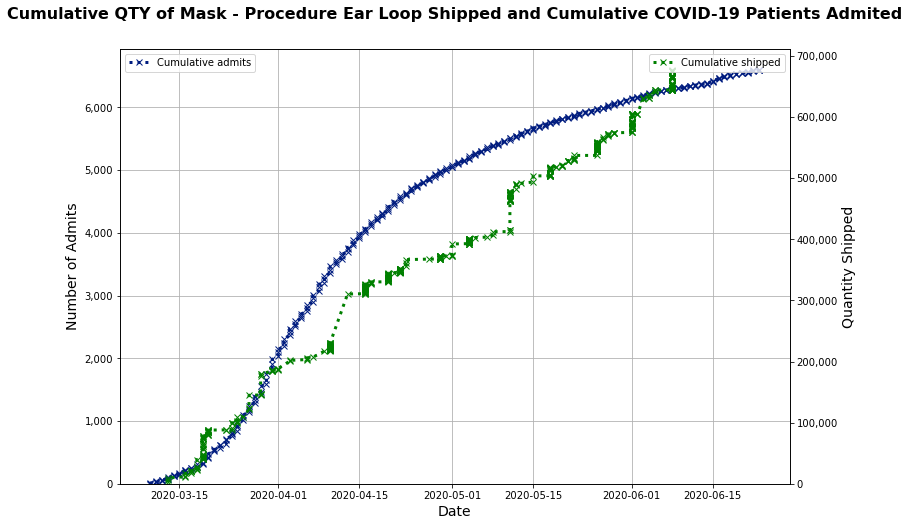

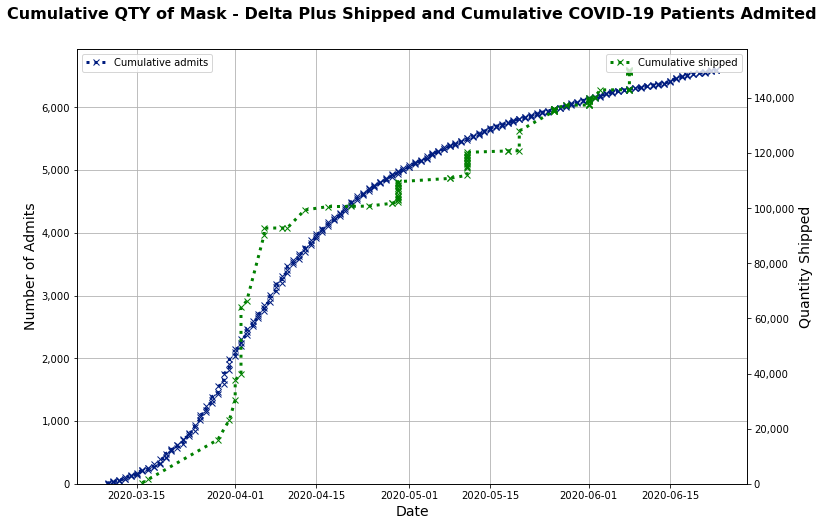

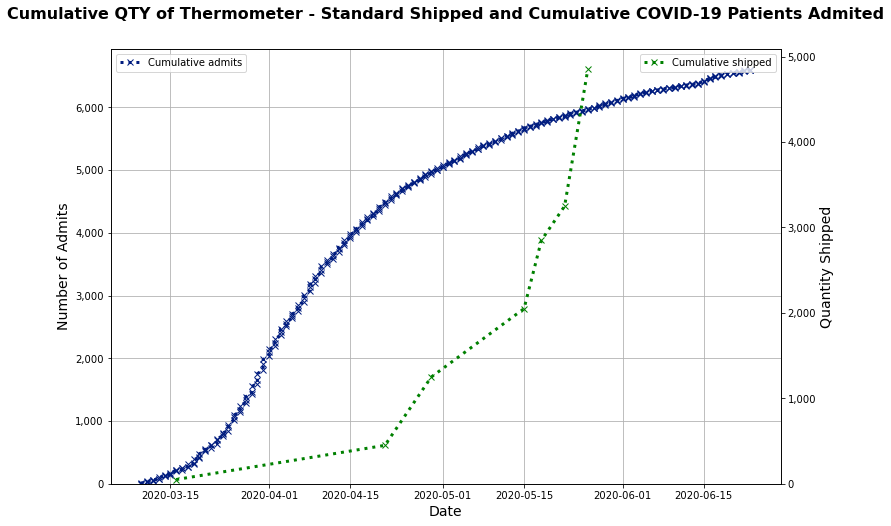

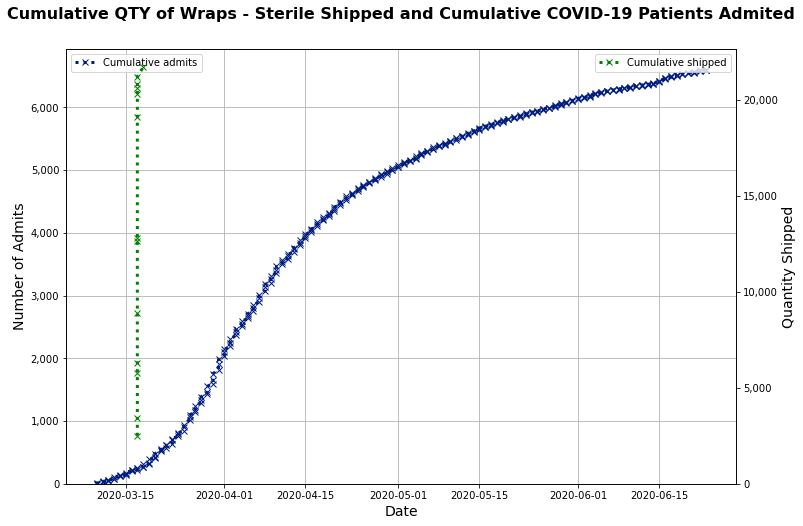

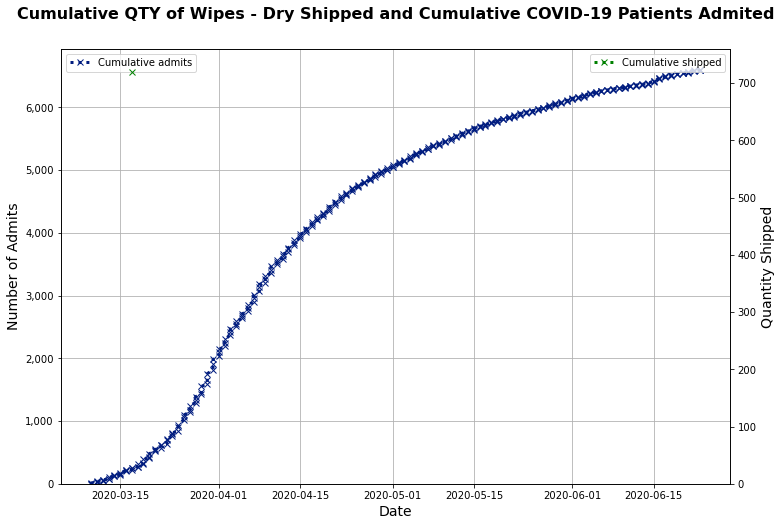

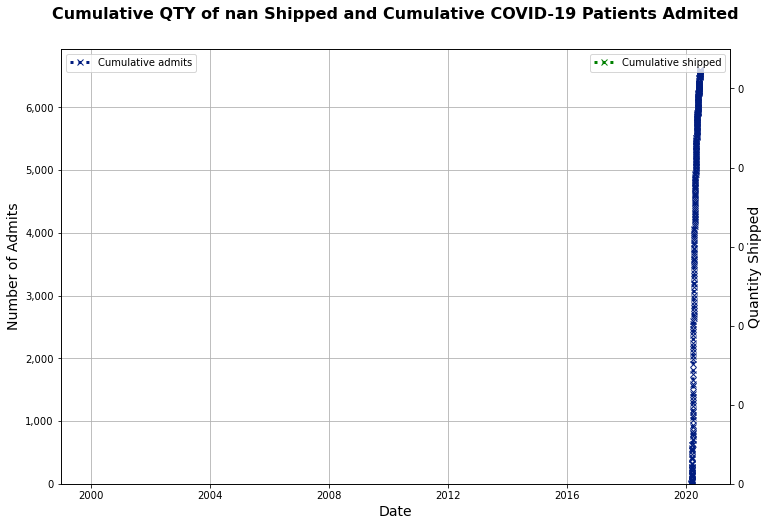

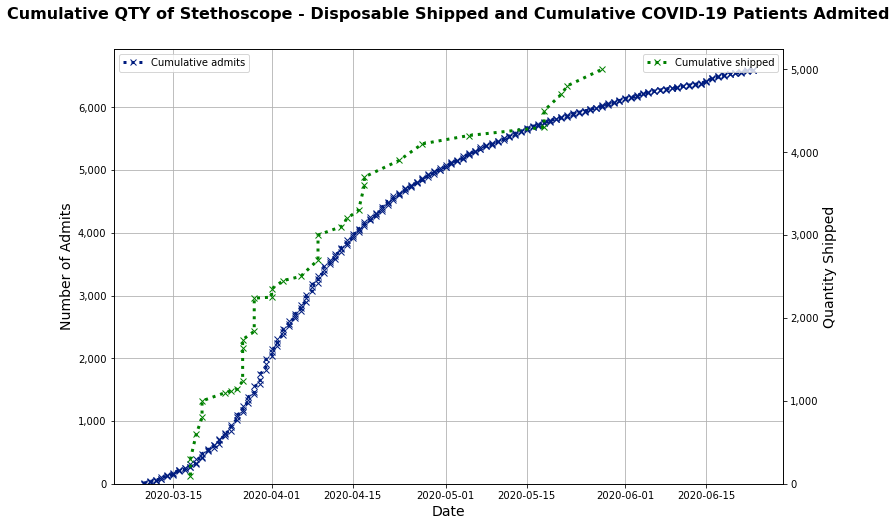

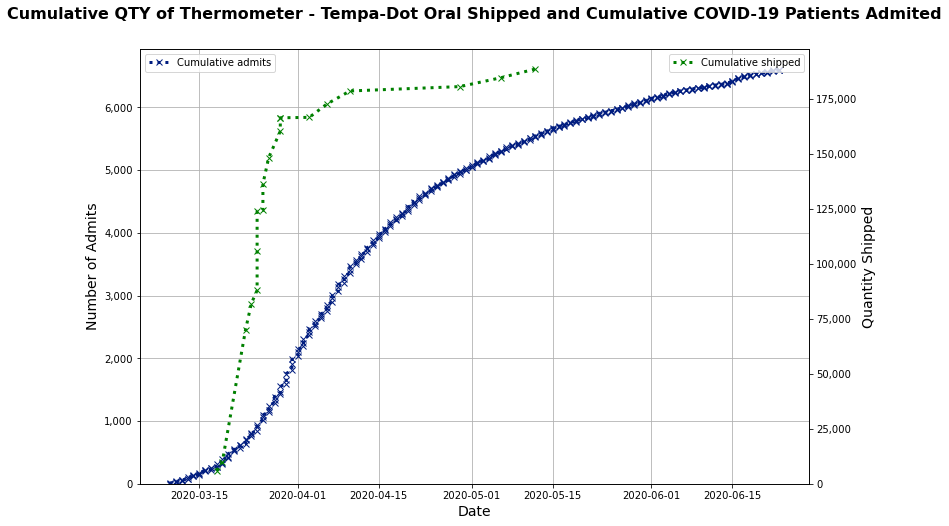

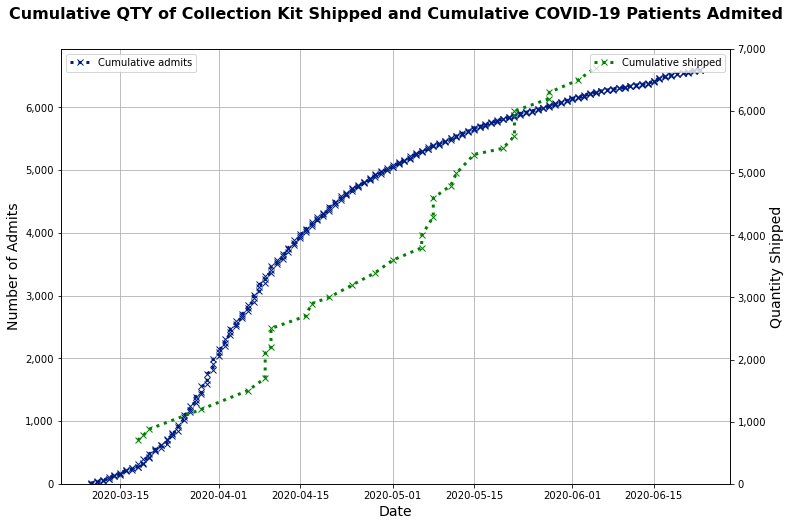

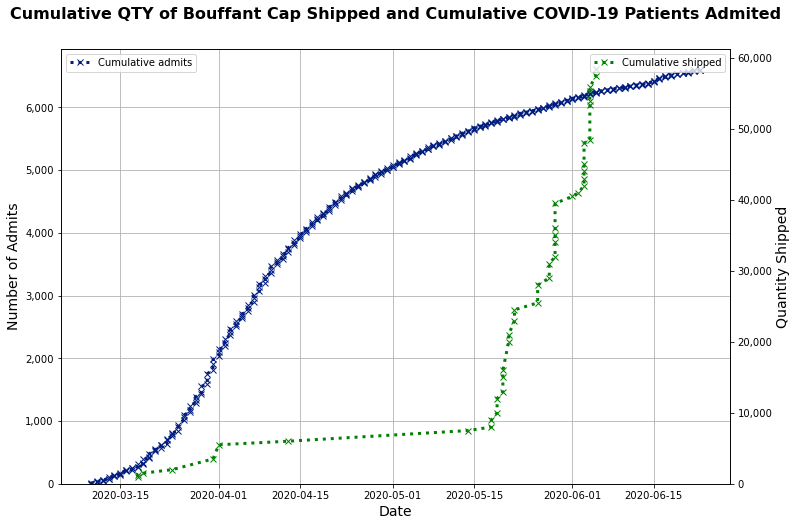

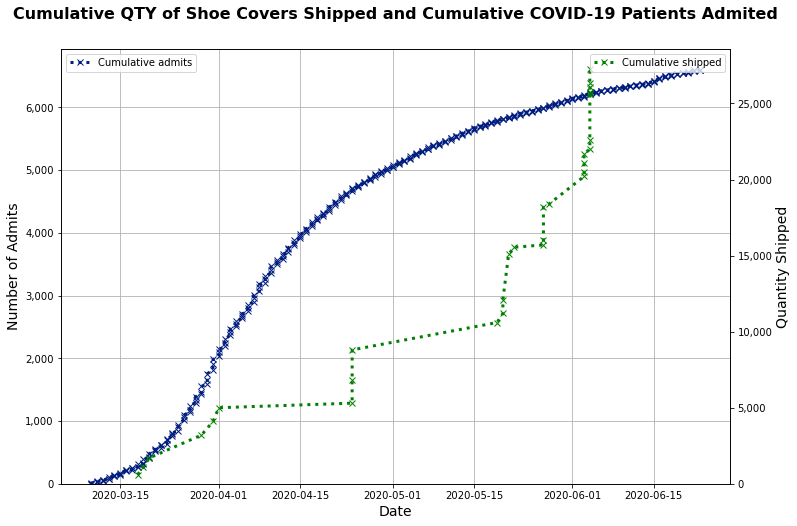

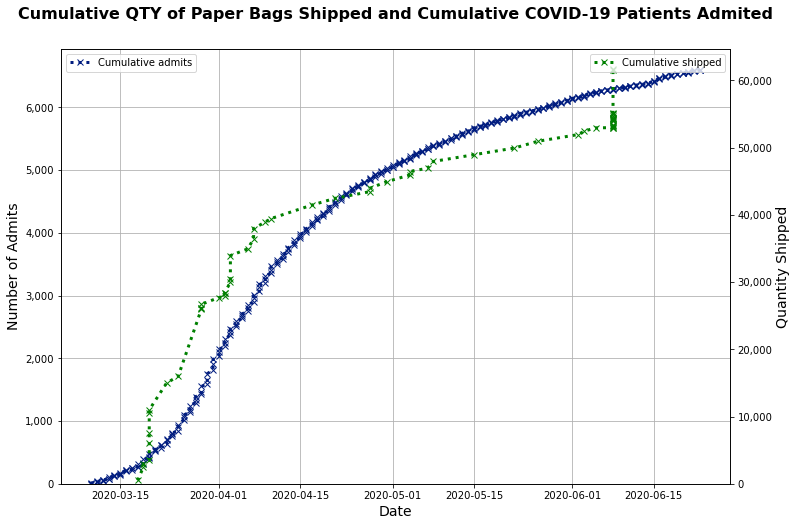

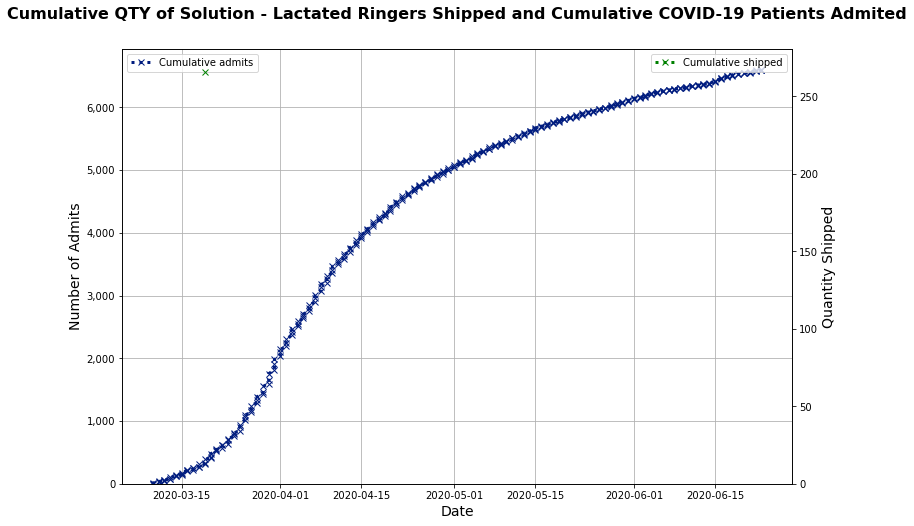

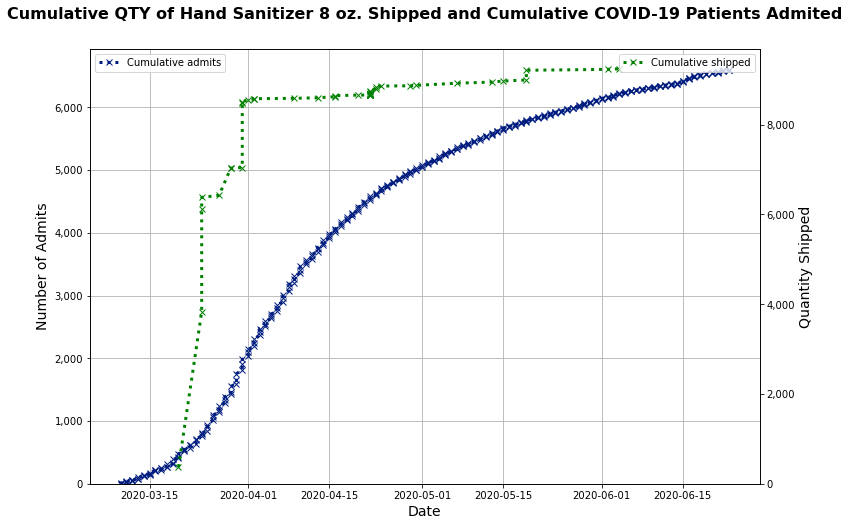

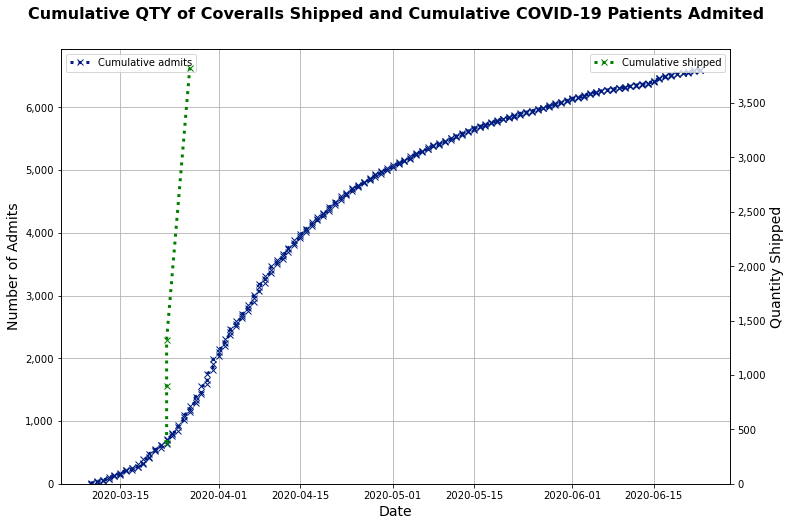

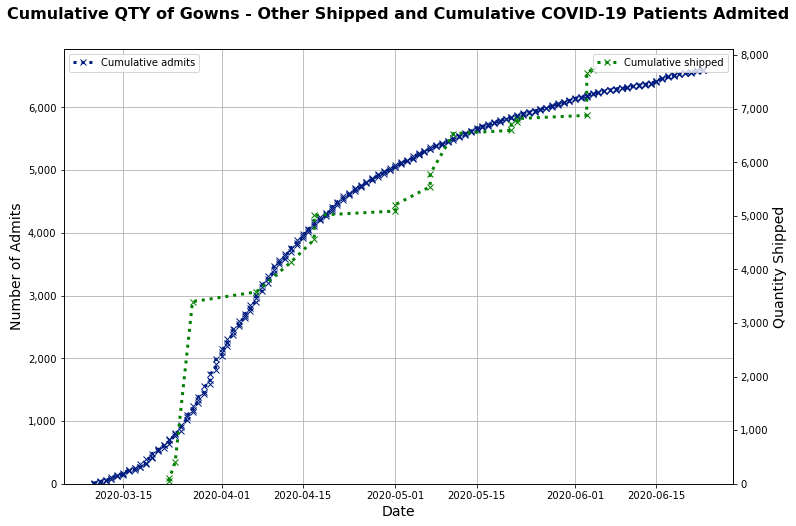

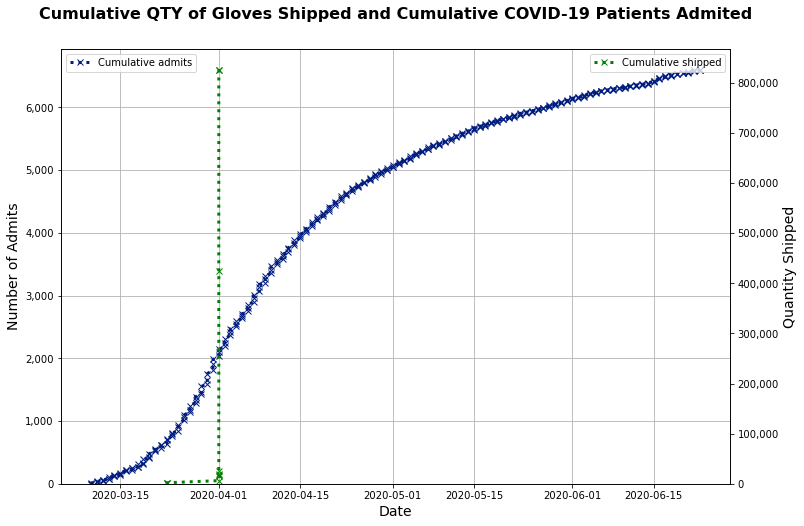

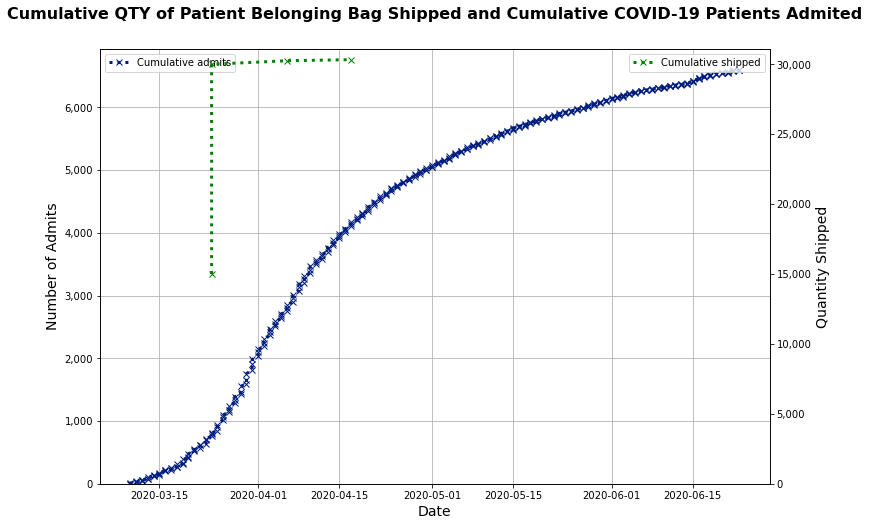

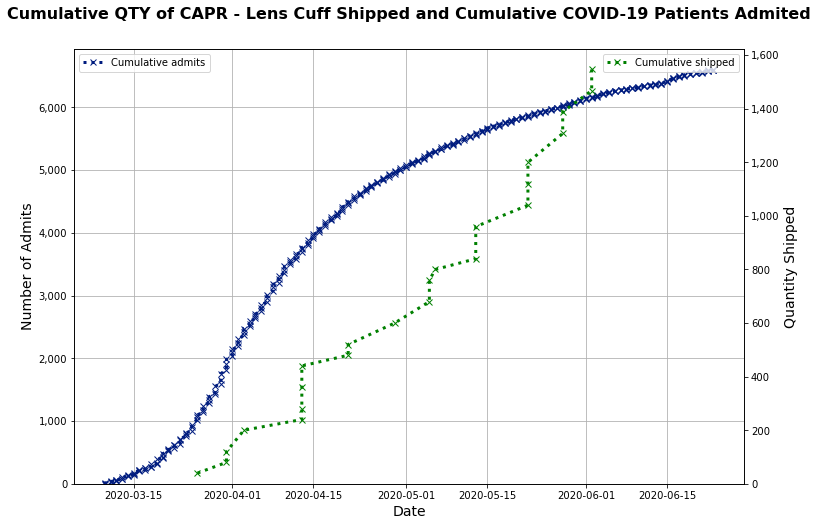

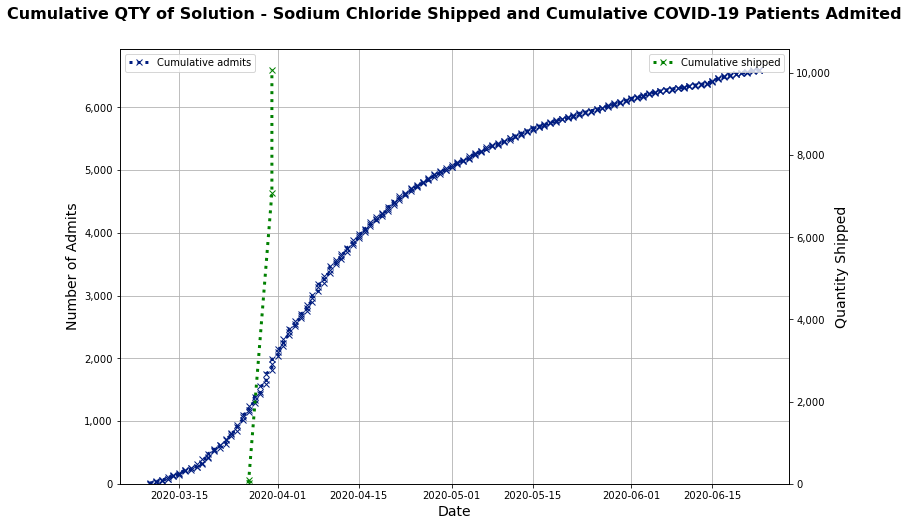

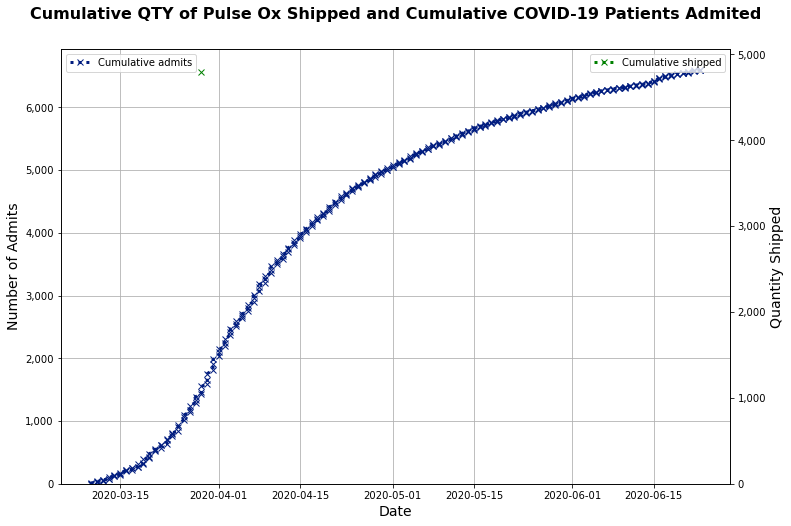

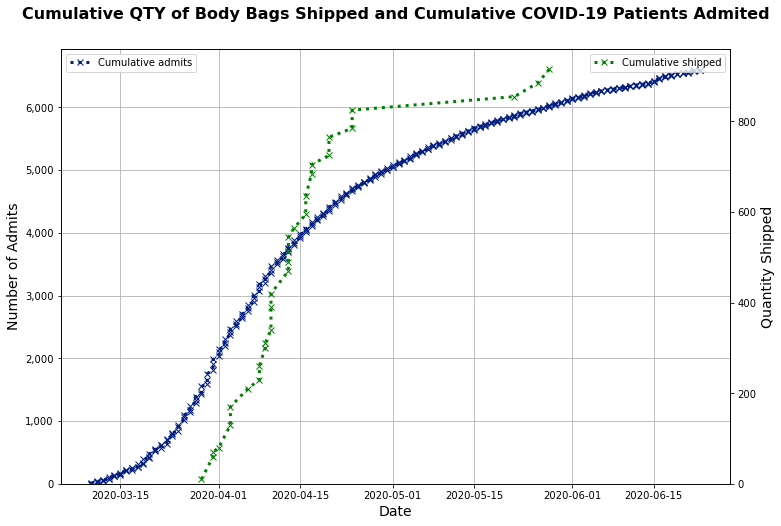

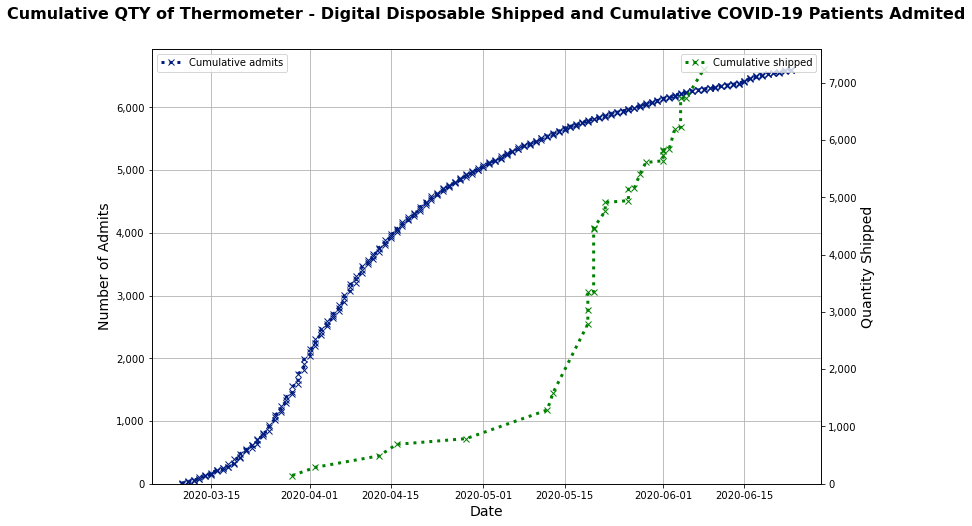

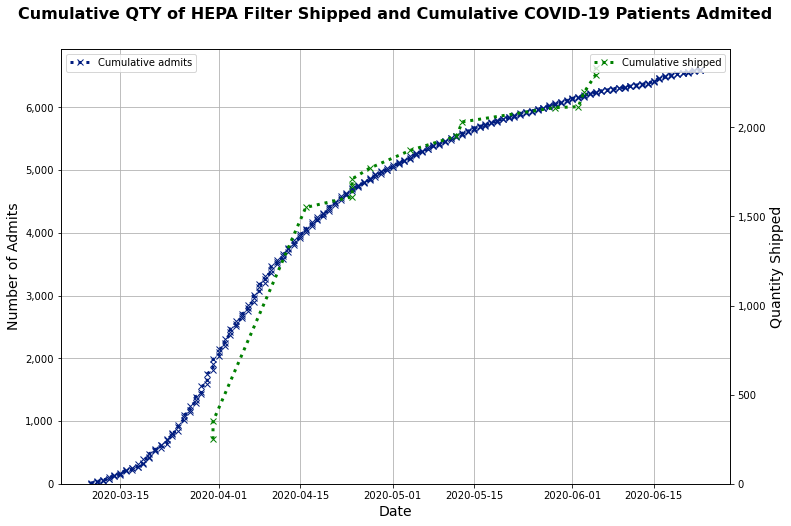

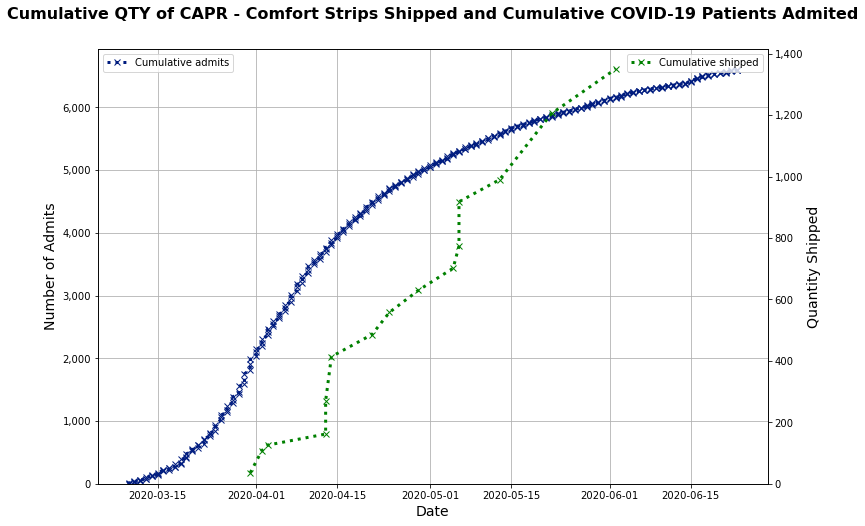

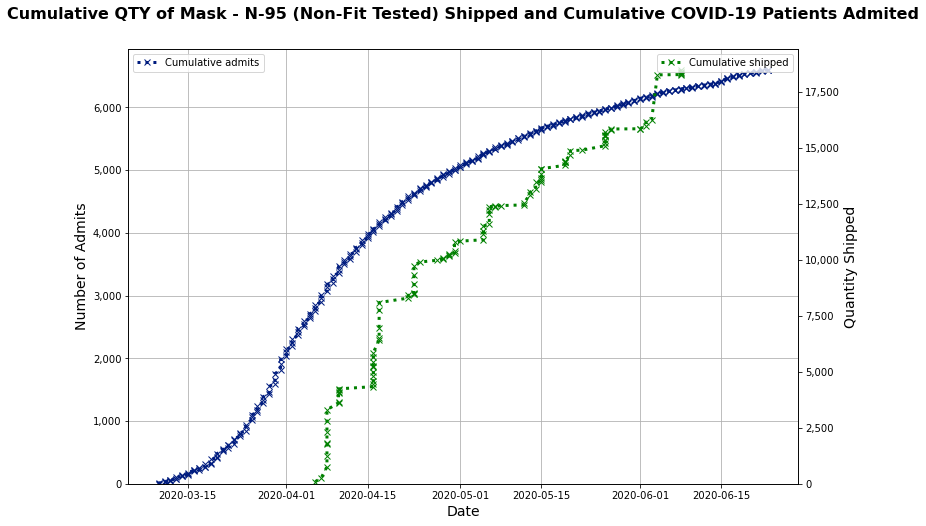

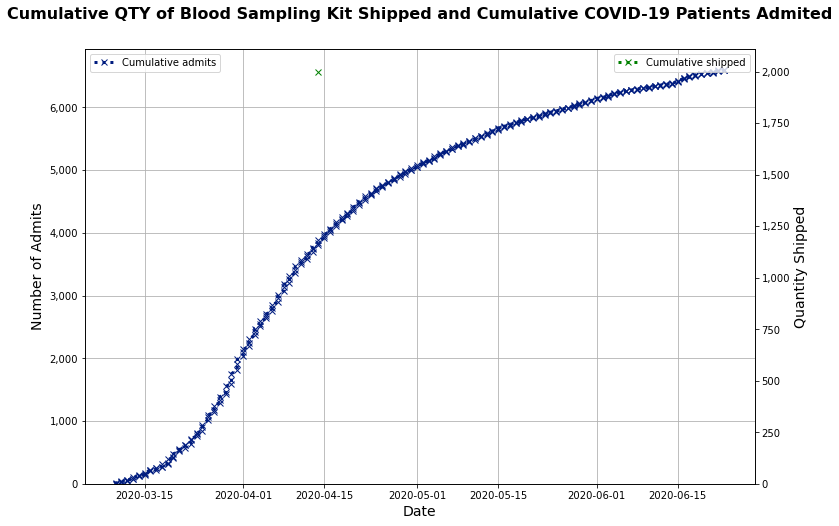

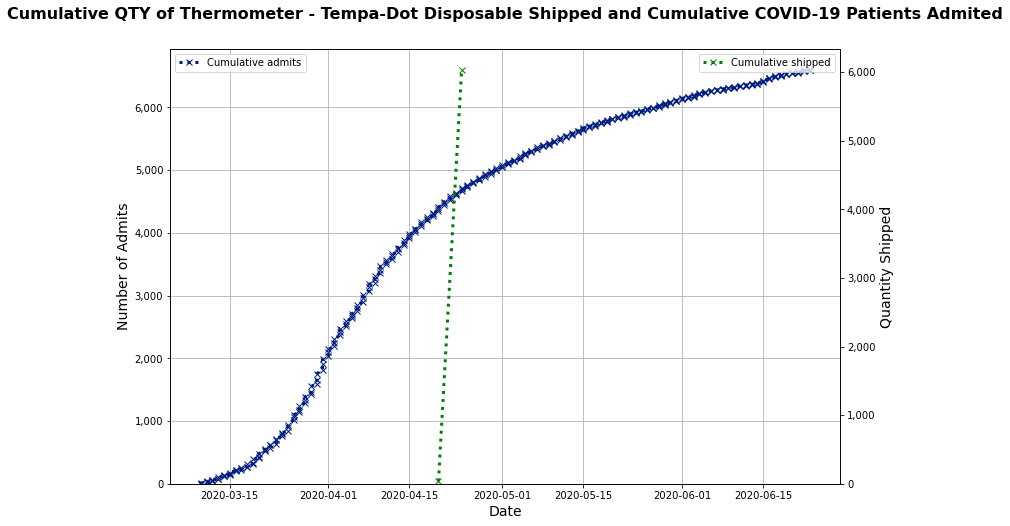

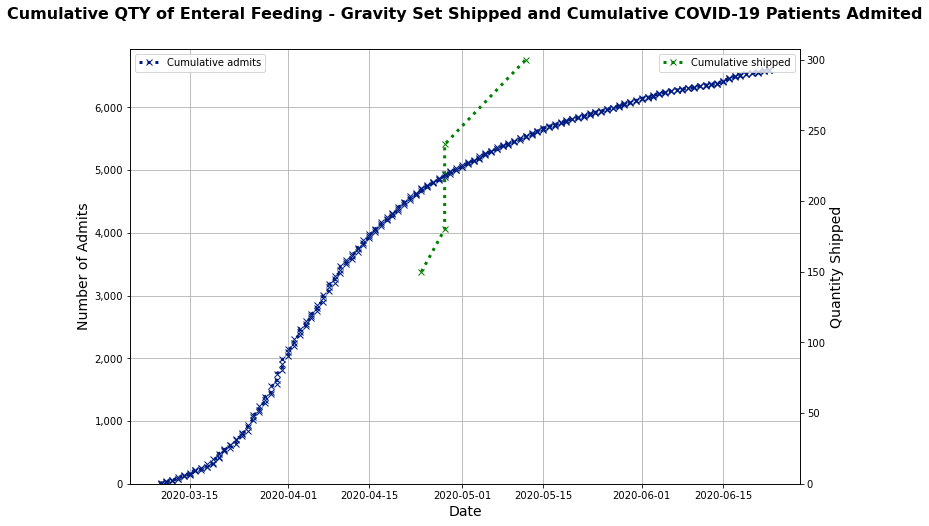

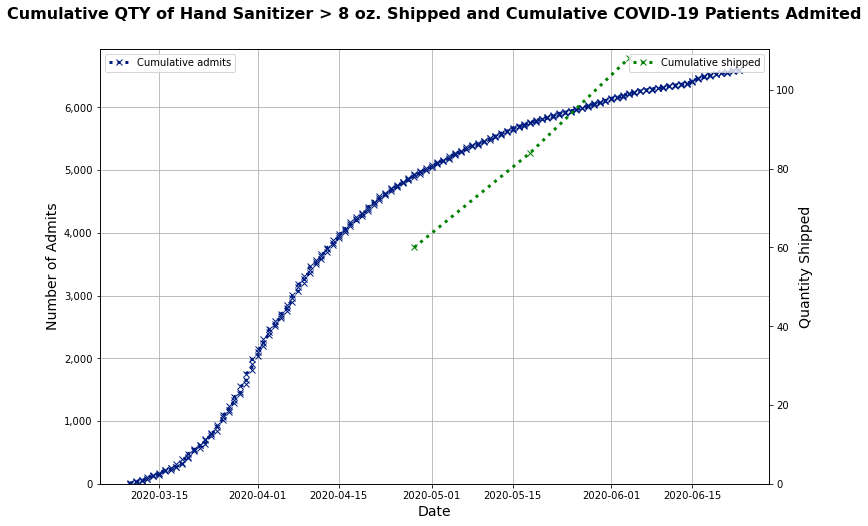

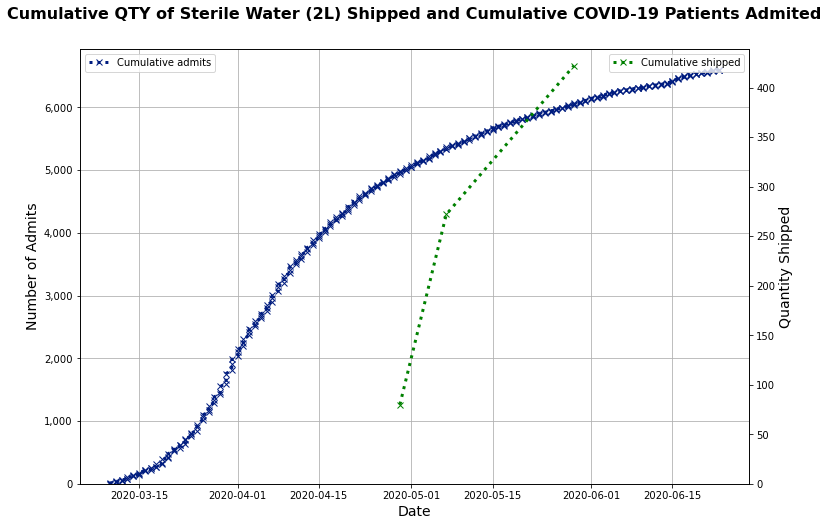

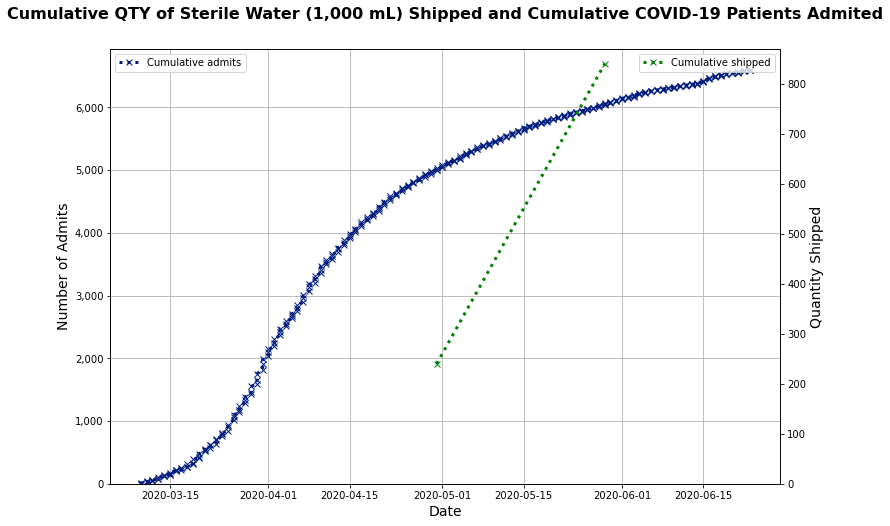

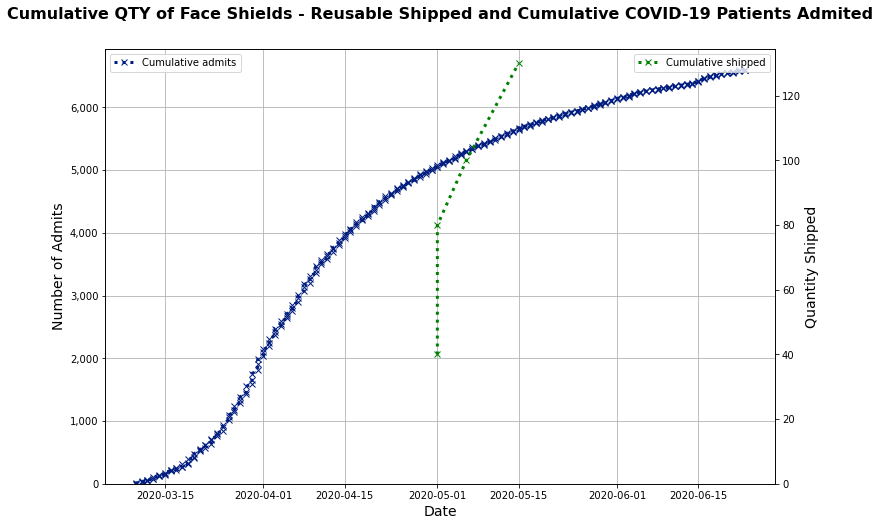

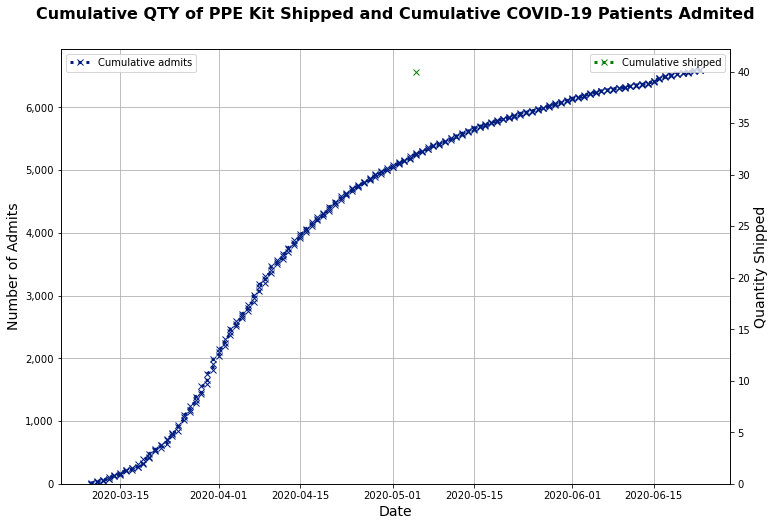

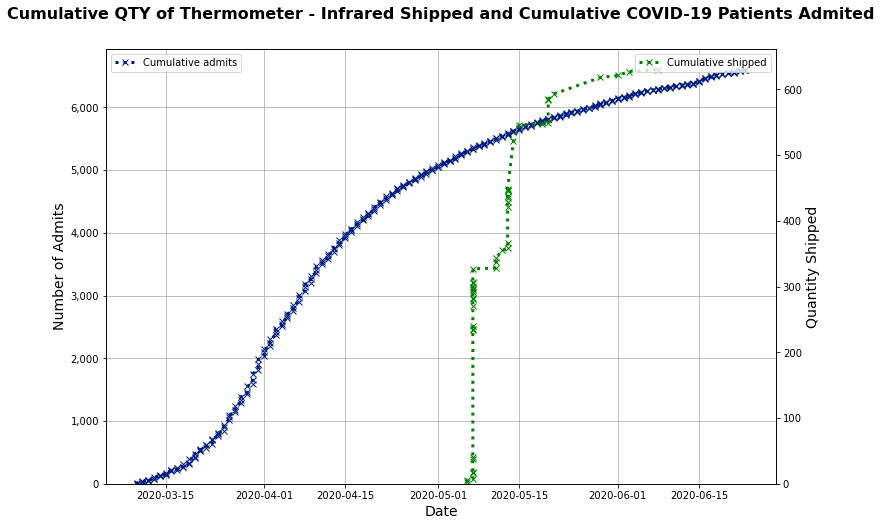

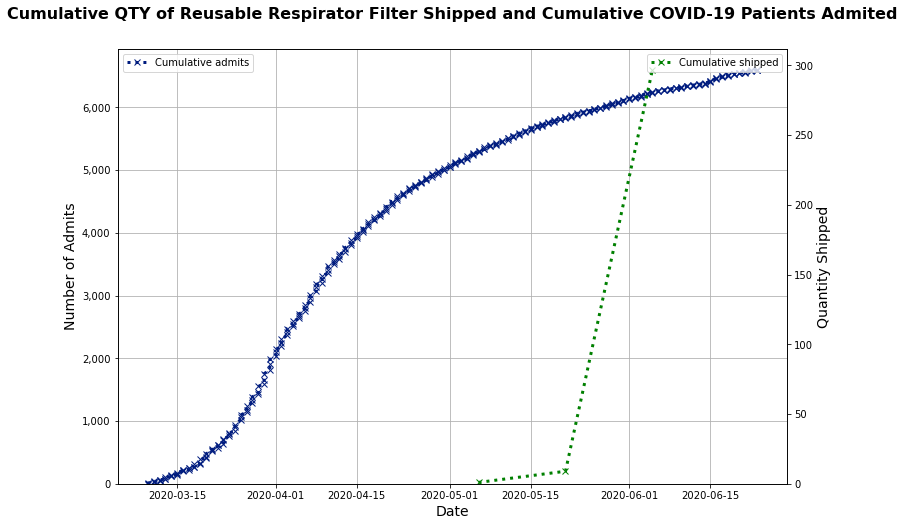

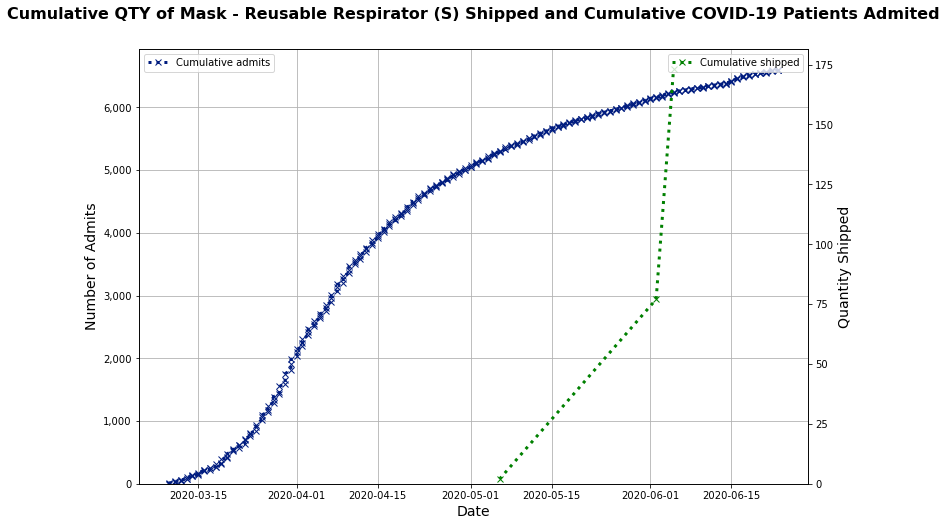

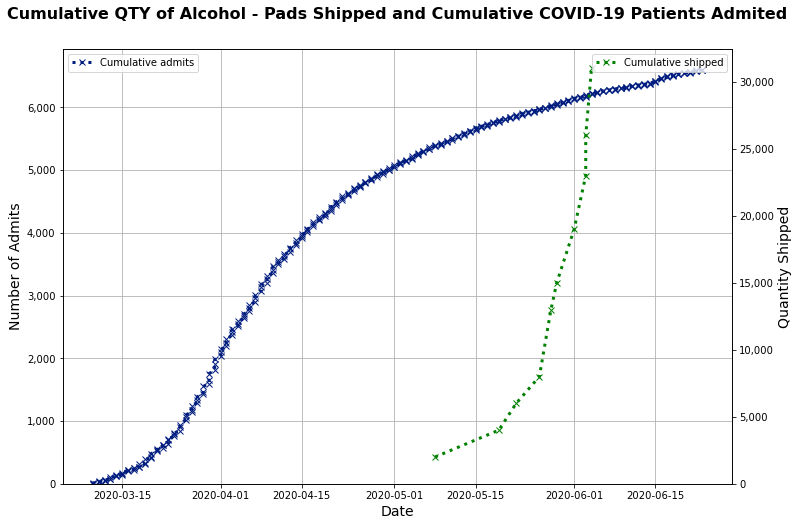

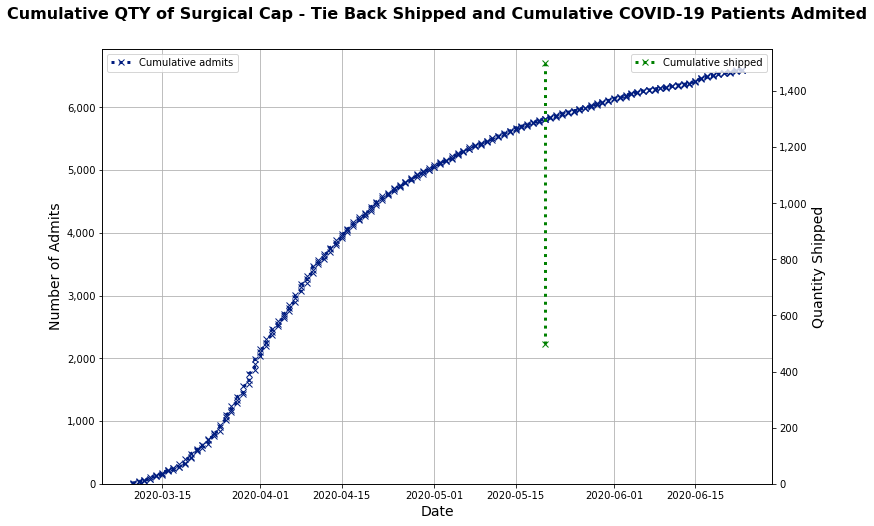

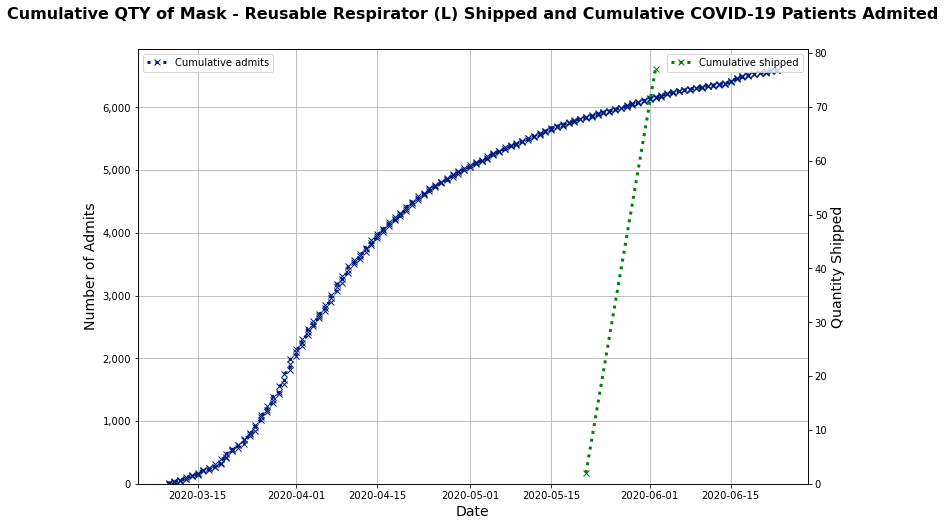

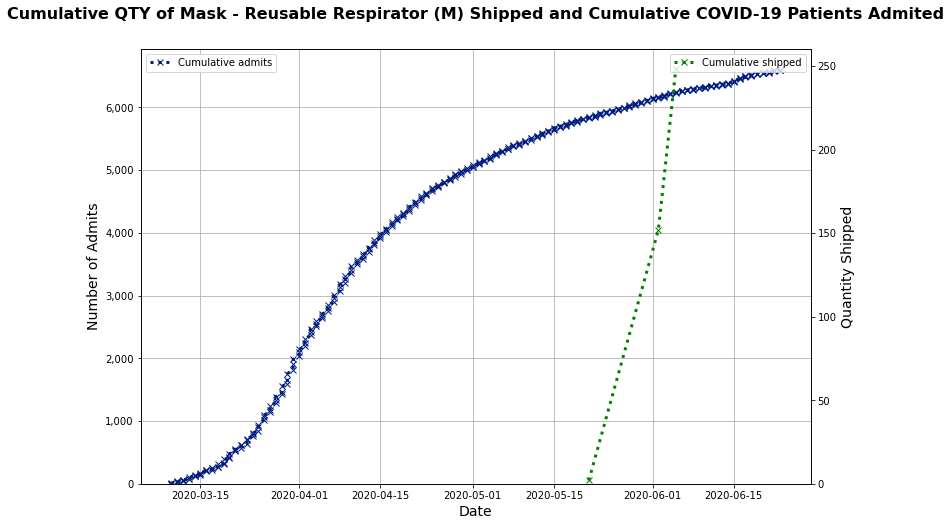

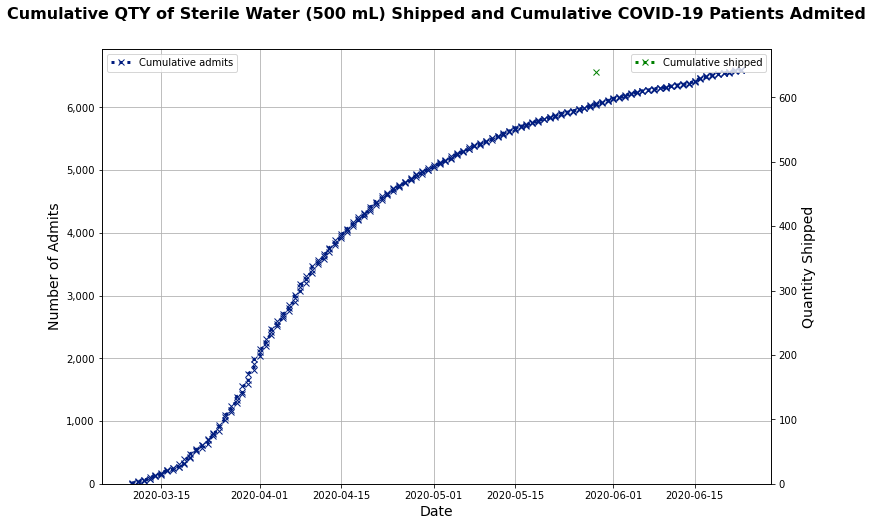

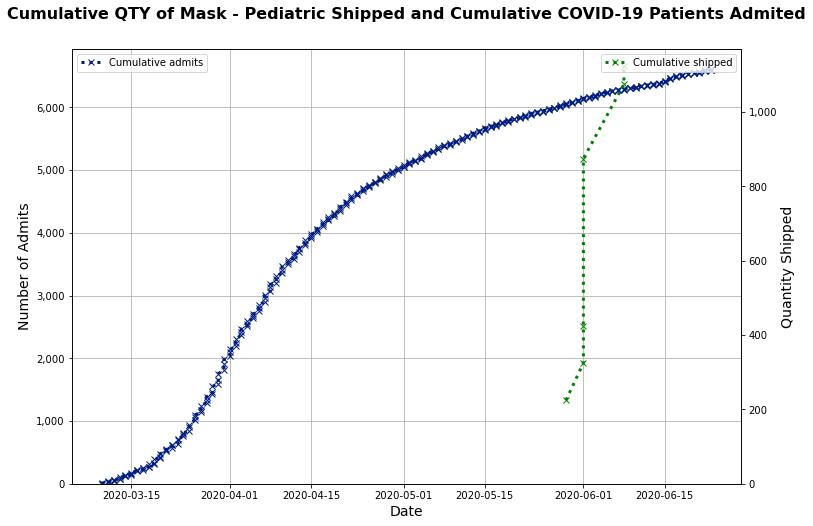

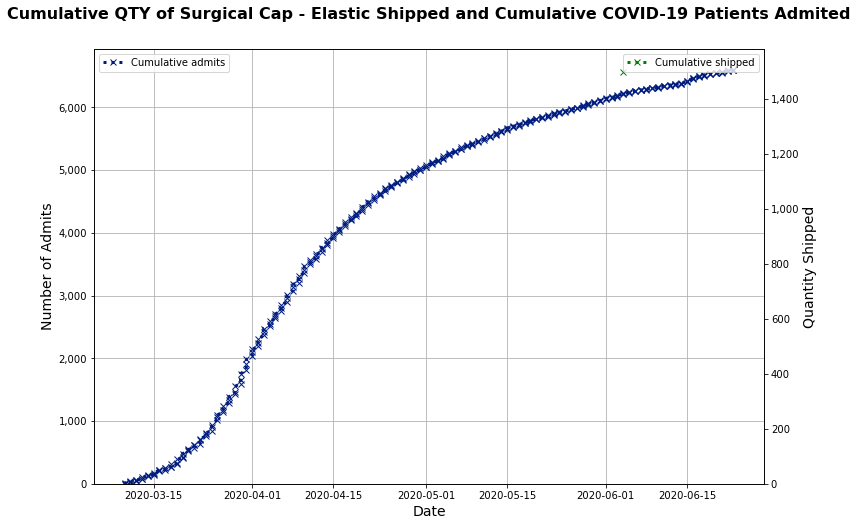

In [85]:
for category in dist_df['Product Category'].unique():
    #settings for plot
    plt.style.use('seaborn-dark-palette')
    fig,ax = plt.subplots()
    fig.set_size_inches(12, 8, forward=True)
    ax2 = ax.twinx()

    ax.plot('Time Grouping (tooltip)', 'Cumulative admits', data = admits_df, linestyle = ':', marker = 'x', linewidth = 3)

    cat_dist_df = dist_df.loc[dist_df['Product Category'] == category]
    cat_dist_df = cat_dist_df.sort_values(by = 'Date')
    result, temp = [], 0
    for value in cat_dist_df['QTY Shipped']:
        temp += value
        result.append(temp)  
    cat_dist_df['Cumulative shipped'] = result
    ax2.plot('Date', 'Cumulative shipped', data = cat_dist_df, linestyle = ':', marker = 'x', linewidth = 3, color = 'green')


    #setting x-axis labels
    ax.set_xlabel("Date",fontsize=14)

    # setting y-axis labels
    ax2.set_ylabel("Quantity Shipped", fontsize=14)
    ax.set_ylabel("Number of Admits", fontsize=14)
    ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax2.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax.set_ylim(ymin=0)
    ax2.set_ylim(ymin=0)

    #labeling graphs
    plt.title('Cumulative QTY of ' + str(category) + ' Shipped and Cumulative COVID-19 Patients Admited', fontsize=16, pad=30, fontweight='bold')
    ax.grid(True)
    ax.legend(loc = 'upper left')
    ax2.legend(loc = 'upper right')
    fig.patch.set_facecolor('white')

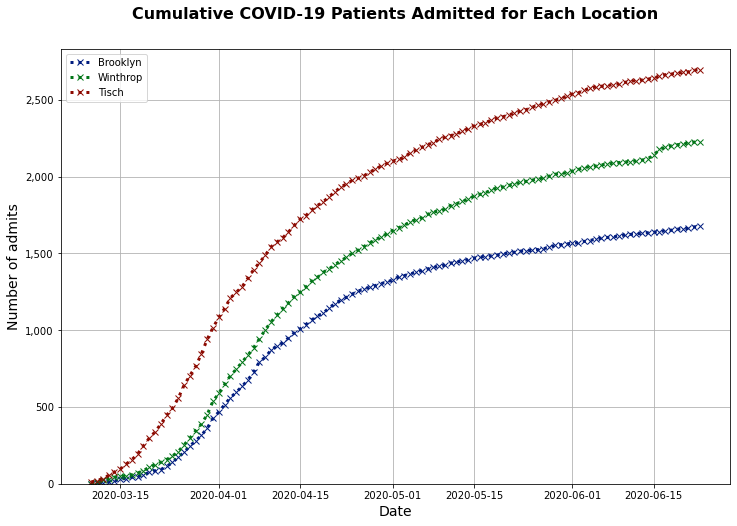

In [86]:
#settings for plot
plt.style.use('seaborn-dark-palette')
fig,ax = plt.subplots()
fig.set_size_inches(12, 8, forward=True)

for loc in admits_df['Facility'].unique():
    loc_admits_df = admits_df.loc[admits_df['Facility'] == loc].copy()
    loc_admits_df = loc_admits_df.sort_values(by = 'Time Grouping (tooltip)')
    result, temp = [], 0
    for value in loc_admits_df['N new admits']:
        temp += value
        result.append(temp)  
    loc_admits_df['Cumulative admits'] = result
    ax.plot('Time Grouping (tooltip)', 'Cumulative admits', data = loc_admits_df, linestyle = ':', marker = 'x', linewidth = 3, label = loc)

#setting x-axis labels
ax.set_xlabel("Date",fontsize=14)

# setting y-axis labels
ax.set_ylabel("Number of admits", fontsize=14)
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_ylim(ymin=0)

#labeling graphs
plt.title('Cumulative COVID-19 Patients Admitted for Each Location', fontsize=16, pad=30, fontweight='bold')
ax.grid(True)
ax.legend(fontsize='medium', loc='upper left')
fig.patch.set_facecolor('white')
fig.savefig('Documents\ppe_2019_vs_2020.png', transparent=False)